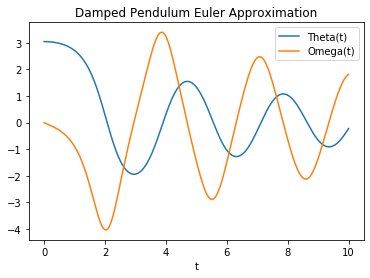

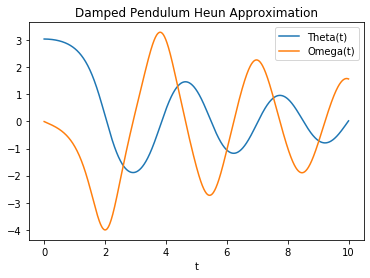

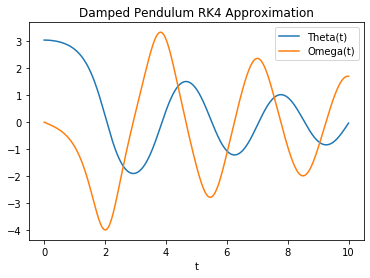

In [12]:
'''
ASTP-720, Fall 2020
Homework 3
Zach Diermyer
Problems 3 & 4
'''

import numpy as np
import matplotlib.pyplot as plt

def euler(func, TimeRange, y0, h):
    '''
    Uses the Euler method to approximate the input function's variables
    (can handle up to 2 variables)
    Inputs:
        func - Function being approximated
        TimeRange - Tuple of starting and ending time of approximation
        y0 - Initial values of function at starting time
        h - Step size
    Returns:
        ApproxFunc - Array of approximated function values
        ApproxFuncPrime - Array of approximated derivative values
    '''
    ApproxFunc = []
    ApproxFuncPrime = []
    t = TimeRange[0]
    t1 = TimeRange[1]
    while t <= t1:
        if t == TimeRange[0]:
            yi1 = y0[0] + h*func(y0, t)[0]
            dyi1 = y0[1] + h*func(y0, t)[1]
        else:
            yi1 = yi[0] + h*func(yi, t)[0]
            dyi1 = yi[1] + h*func(yi, t)[1]
        ApproxFunc.append(yi1)
        ApproxFuncPrime.append(dyi1)
        t += h
        yi = (yi1, dyi1)
    return(ApproxFunc, ApproxFuncPrime)
        
def heun(func, TimeRange, y0, h):
    '''
    Uses Heun's method to approximate the input function's variables
    (can handle up to 2 variables)
    Inputs:
        func - Function being approximated
        TimeRange - Tuple of starting and ending time of approximation
        y0 - Initial values of function at starting time
        h - Step size
    Returns:
        ApproxFunc - Array of approximated function values
        ApproxFuncPrime - Array of approximated derivative values
    '''
    ApproxFunc = []
    ApproxFuncPrime = []
    t = TimeRange[0]
    t1 = TimeRange[1]
    while t <= t1:
        if t == TimeRange[0]:
            ytil = [y0[0] + h*func(y0, t)[0], y0[1] + h*func(y0, t)[1]]
            yi1 = y0[0] + 0.5*h*(func(ytil, t)[0] + func(y0, t)[0])
            dyi1 = y0[1] + 0.5*h*(func(ytil, t)[1] + func(y0, t)[1])
        else:
            ytil = [yi[0] + h*func(yi, t)[0], yi[1] + h*func(yi, t)[1]]
            yi1 = yi[0] + 0.5*h*(func(ytil, t)[0] + func(yi, t)[0])
            dyi1 = yi[1] + 0.5*h*(func(ytil, t)[1] + func(yi, t)[1])
        ApproxFunc.append(yi1)
        ApproxFuncPrime.append(dyi1)
        t += h
        yi = (yi1, dyi1)
    return(ApproxFunc, ApproxFuncPrime)
    
def rungekutta(func, TimeRange, y0, h):
    '''
    Uses the Runge-Kutta method to approximate the input function's variables
    (can handle up to 2 variables)
    Inputs:
        func - Function being approximated
        TimeRange - Tuple of starting and ending time of approximation
        y0 - Initial values of function at starting time
        h - Step size
    Returns:
        ApproxFunc - Array of approximated function values
        ApproxFuncPrime - Array of approximated derivative values
    '''
    ApproxFunc = []
    ApproxFuncPrime = []
    t = TimeRange[0]
    t1 = TimeRange[1]
    while t <= t1:
        if t == TimeRange[0]:
            k1 = h*func(y0, t)[0]
            k2 = h*func((y0[0]+(k1/2), y0[1]+(k1/2)), t+(h/2))[0]
            k3 = h*func((y0[0]+(k2/2), y0[1]+(k2/2)), t+(h/2))[0]
            k4 = h*func((y0[0]+k3, y0[1]+k3), t+h)[0]
            yi1 = y0[0] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
            dk1 = h*func(y0, t)[1]
            dk2 = h*func((y0[0]+(k1/2), y0[1]+(k1/2)), t+(h/2))[1]
            dk3 = h*func((y0[0]+(k2/2), y0[1]+(k2/2)), t+(h/2))[1]
            dk4 = h*func((y0[0]+k3, y0[1]+k3), t+h)[1]
            dyi1 = y0[1] + (1/6)*(dk1 + 2*dk2 + 2*dk3 + dk4)
        else:
            k1 = h*func(yi, t)[0]
            k2 = h*func((yi[0]+(k1/2), yi[1]+(k1/2)), t+(h/2))[0]
            k3 = h*func((yi[0]+(k2/2), yi[1]+(k2/2)), t+(h/2))[0]
            k4 = h*func((yi[0]+k3, yi[1]+k3), t+h)[0]
            yi1 = yi[0] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
            dk1 = h*func(yi, t)[1]
            dk2 = h*func((yi[0]+(k1/2), yi[1]+(k1/2)), t+(h/2))[1]
            dk3 = h*func((yi[0]+(k2/2), yi[1]+(k2/2)), t+(h/2))[1]
            dk4 = h*func((yi[0]+k3, yi[1]+k3), t+h)[1]
            dyi1 = yi[1] + (1/6)*(dk1 + 2*dk2 + 2*dk3 + dk4)
        ApproxFunc.append(yi1)
        ApproxFuncPrime.append(dyi1)
        t += h
        yi = (yi1, dyi1)
    return(ApproxFunc, ApproxFuncPrime)

def pend(y, t):
    theta, omega = y
    dydt = [omega, -0.25*omega - 5.0*np.sin(theta)]
    return dydt

def main():
    approx1 = euler(func = pend, TimeRange = (0.01,10), y0 = (np.pi - 0.1, 0.0), h = 0.01)
    t = np.linspace(0,10,1000)
    labels = ('Theta(t)', 'Omega(t)')
    plt.figure(1)
    plt.plot(t, approx1[0])
    plt.plot(t, approx1[1])
    plt.title('Damped Pendulum Euler Approximation')
    plt.xlabel('t')
    plt.legend(labels = labels)
    approx2 = heun(func = pend, TimeRange = (0.01,10), y0 = (np.pi - 0.1, 0.0), h = 0.01)
    plt.figure(2)
    plt.plot(t, approx2[0])
    plt.plot(t, approx2[1])
    plt.title('Damped Pendulum Heun Approximation')
    plt.xlabel('t')
    plt.legend(labels = labels)
    approx3 = rungekutta(func = pend, TimeRange = (0.01,10), y0 = (np.pi - 0.1, 0.0), h = 0.01)
    plt.figure(3)
    plt.plot(t, approx3[0])
    plt.plot(t, approx3[1])
    plt.title('Damped Pendulum RK4 Approximation')
    plt.xlabel('t')
    plt.legend(labels = labels)
    
main()

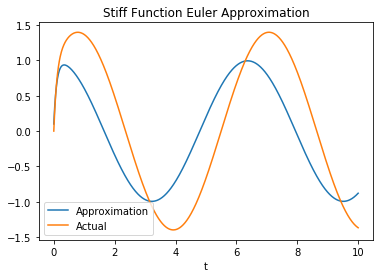

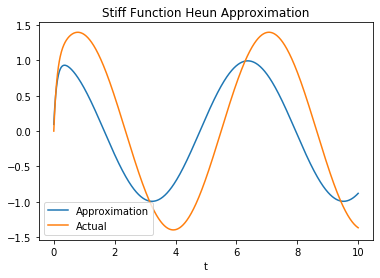

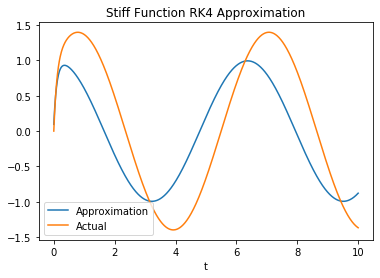

In [20]:
'''
ASTP-720, Fall 2020
Homework 3
Zach Diermyer
Problems 3 & 5
'''

import numpy as np
import matplotlib.pyplot as plt

def euler(func, TimeRange, y0, h):
    '''
    Uses the Euler method to approximate the input function
    Inputs:
        func - Function being approximated
        TimeRange - Tuple of starting and ending time of approximation
        y0 - Initial values of function at starting time
        h - Step size
    Returns:
        ApproxFunc - Array of approximated function values
    '''
    ApproxFunc = []
    t = TimeRange[0]
    t1 = TimeRange[1]
    while t <= t1:
        if t == TimeRange[0]:
            yi1 = y0 + h*func(y0, t)
        else:
            yi1 = yi + h*func(yi, t)
        ApproxFunc.append(yi1)
        t += h
        yi = yi1
    return(ApproxFunc)
        
def heun(func, TimeRange, y0, h):
    '''
    Uses Heun's method to approximate the input function
    Inputs:
        func - Function being approximated
        TimeRange - Tuple of starting and ending time of approximation
        y0 - Initial values of function at starting time
        h - Step size
    Returns:
        ApproxFunc - Array of approximated function values
    '''
    ApproxFunc = []
    t = TimeRange[0]
    t1 = TimeRange[1]
    while t <= t1:
        if t == TimeRange[0]:
            ytil = y0 + h*func(y0, t)
            yi1 = y0 + 0.5*h*(func(ytil, t) + func(y0, t))
        else:
            ytil = yi + h*func(yi, t)
            yi1 = yi + 0.5*h*(func(ytil, t) + func(yi, t))
        ApproxFunc.append(yi1)
        t += h
        yi = yi1
    return(ApproxFunc)
    
def rungekutta(func, TimeRange, y0, h):
    '''
    Uses the Runge-Kutta method to approximate the input function
    Inputs:
        func - Function being approximated
        TimeRange - Tuple of starting and ending time of approximation
        y0 - Initial values of function at starting time
        h - Step size
    Returns:
        ApproxFunc - Array of approximated function values
    '''
    ApproxFunc = []
    t = TimeRange[0]
    t1 = TimeRange[1]
    while t <= t1:
        if t == TimeRange[0]:
            k1 = h*func(y0, t)
            k2 = h*func(y0+(k1/2), t+(h/2))
            k3 = h*func(y0+(k2/2), t+(h/2))
            k4 = h*func(y0+k3, t+h)
            yi1 = y0 + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        else:
            k1 = h*func(yi, t)
            k2 = h*func(yi+(k1/2), t+(h/2))
            k3 = h*func(yi+(k2/2), t+(h/2))
            k4 = h*func(yi+k3, t+h)
            yi1 = yi + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        ApproxFunc.append(yi1)
        t += h
        yi = yi1
    return(ApproxFunc)

def stiff(y, t):
    lamd = 10
    dydt = -lamd*(y-np.cos(t))
    return(dydt)

def main():
    t = np.linspace(0,10,1000)
    actual = []
    lamd = 10
    coeff = (lamd**2/(1+lamd**2))
    for i in range(len(t)):
        yt = -(coeff)*np.exp(-lamd*t[i]) + coeff*np.sin(t[i]) + coeff*np.cos(t[i])
        actual.append(yt)
    approx1 = euler(func = stiff, TimeRange = (0.01,10), y0 = 0, h = 0.01)
    labels = ('Approximation', 'Actual')
    plt.figure(1)
    plt.plot(t, approx1)
    plt.plot(t, actual)
    plt.title('Stiff Function Euler Approximation')
    plt.xlabel('t')
    plt.legend(labels = labels)
    approx2 = heun(func = stiff, TimeRange = (0.01,10), y0 = 0, h = 0.01)
    plt.figure(2)
    plt.plot(t, approx2)
    plt.plot(t, actual)
    plt.title('Stiff Function Heun Approximation')
    plt.xlabel('t')
    plt.legend(labels = labels)
    approx3 = rungekutta(func = stiff, TimeRange = (0.01,10), y0 = 0, h = 0.01)
    plt.figure(3)
    plt.plot(t, approx3)
    plt.plot(t, actual)
    plt.title('Stiff Function RK4 Approximation')
    plt.xlabel('t')
    plt.legend(labels = labels)
    
main()